# Traccia T6b - Explainable ML
## Autore
* **Cupellaro Luca** 0365269
## Introduzione
Questo Notebook si propone di effettuare un'analisi di molteplici modelli di Machine Learning da applicare al data set "autoscout_prices1.csv". Tale data set è stato costruito per predire il prezzo delle automabili dato un dataset con 23 attributi:
Per prima cosa, si effettuerà un pre-processamento dei dati, in modo tale che le informazioni all'interno del data set siano ben rappresentate. Dopodiché, si considereranno diversi modelli di Machine Learning da applicare al data set e se ne valuteranno le relative prestazioni.

## Librerie importate
Le principali librerie Python utilizzate per lo svolgimento del progetto sono:
* **Matplotlib** per la creazione di grafici e la visualizzazione di dati;
* **Numpy** per eseguire operazioni matematiche su vettori e matrici;
* **Pandas** per effettuare inserimento, analisi e manipolazione di dati;
* **Seaborn** per la creazione di heatmap;
* **Skfda** per utilizzare e valutare il modello Nadaraya-Watson (richiede il comando _pip install scikit-fda_ per essere installata e importata);
* **Sklearn** per utilizzare e valutare gli altri modelli di Machine Learning.
**shap** per utilizzare e valutare gli altri modelli di Machine Learning.

In [16]:


import pandas as pd
import numpy as np
import shap
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import xgboost as xgb
from IPython.display import display
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from keras import layers
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from pytorch_tabular import TabularModel
from sklearn.linear_model import ElasticNet
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_validate

import tensorflow as tf
 
from pytorch_tabular.tabular_model import TabularModel
from pytorch_tabular.config import DataConfig, ModelConfig, TrainerConfig
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, ModelConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models import CategoryEmbeddingModelConfig

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from xgboost import XGBRegressor

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.debugging.set_log_device_placement(False)  # Disattiva il logging dei dispositivi

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models import CategoryEmbeddingModelConfig


import datetime

# Crea una directory unica per i log
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [17]:
%reload_ext tensorboard
%load_ext tensorboard

%tensorboard --logdir logs/fit --host localhost --port 8087 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Il file contenente il data set ("autoscout_prices1.csv") viene caricato, si contano il numero di righe e si elimianno le righe vuote se presenti.

In [18]:

# Carica il dataset
data = pd.read_csv("/home/luca/ProgrammiML/autoscout_prices1.csv", sep=',')
# Conta il numero di righe
numero_righe = len(data)
print(numero_righe)

# Visualizza le prime righe
display(data.head())


15915


,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


## Pre-processamento dei dati
Per prima cosa, è opportuno pre-processare i dati del nostro data set in modo tale che potranno essere trattati al meglio. 
In particolare:
* Le feature in totale sono 23  
* Di cui 2 sono interi
* 7 sono float
* Non esistono valori nulli in alcuna feature.


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [20]:
# Mostra tutti i conteggi
display(data["make_model"].value_counts())
display(data["body_type"].value_counts())
display(data["price"].value_counts())
display(data["vat"].value_counts())
display(data["km"].value_counts())
display(data["Type"].value_counts())
display(data["Fuel"].value_counts())
display(data["Gears"].value_counts())
display(data["Comfort_Convenience"].value_counts())
display(data["Entertainment_Media"].value_counts())
display(data["Extras"].value_counts())
display(data["Safety_Security"].value_counts())
display(data["age"].value_counts())
display(data["Previous_Owners"].value_counts())
display(data["hp_kW"].value_counts())
display(data["Inspection_new"].value_counts())
display(data["Paint_Type"].value_counts())
display(data["Upholstery_type"].value_counts())
display(data["Gearing_Type"].value_counts())
display(data["Displacement_cc"].value_counts())
display(data["Drive_chain"].value_counts())
display(data["cons_comb"].value_counts())


make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

body_type
Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: count, dtype: int64

price
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: count, Length: 2952, dtype: int64

vat
VAT deductible      15044
Price negotiable      871
Name: count, dtype: int64

km
10.000000       1044
1647.362609      985
1.000000         367
5.000000         170
50.000000        148
                ... 
43197.000000       1
10027.000000       1
35882.000000       1
57840.000000       1
57.000000          1
Name: count, Length: 6691, dtype: int64

Type
Used              11095
New                1649
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: count, dtype: int64

Fuel
Benzine     8548
Diesel      7298
LPG/CNG       64
Electric       5
Name: count, dtype: int64

Gears
6.0    8623
5.0    4257
7.0    2810
8.0     225
Name: count, dtype: int64

Comfort_Convenience
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   388
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                                   187
Ai

Entertainment_Media
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                      1737
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                  1134
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB        1009
On-board computer                                                                615
Radio                                                                            558
                                                                                ... 
Bluetooth,CD player,MP3                                                            1
CD player,USB                                                                      1
Bluetooth,CD player,Digital radio,Radio,USB                                        1
Bluetooth,CD player,Digital radio,MP3,On-board computer,Radio,Television,USB       1
Hands-free equipment,On-board computer,Radio,Sound system                          1
Name: count, Length: 346, dtype: int64

Extras
Alloy wheels                                                                                               5785
Alloy wheels,Touch screen                                                                                   697
Roof rack                                                                                                   595
Alloy wheels,Voice Control                                                                                  582
Alloy wheels,Touch screen,Voice Control                                                                     544
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                             

Safety_Security
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                  729
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                             480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure

age
1.0    4526
0.0    4433
3.0    3679
2.0    3277
Name: count, dtype: int64

Previous_Owners
1.0    14158
2.0     1172
0.0      554
3.0       29
4.0        2
Name: count, dtype: int64

hp_kW
85.0     2544
66.0     2121
81.0     1403
100.0    1316
110.0    1117
         ... 
75.0        1
132.0       1
115.0       1
195.0       1
133.0       1
Name: count, Length: 77, dtype: int64

Inspection_new
0    11983
1     3932
Name: count, dtype: int64

Paint_Type
Metallic       15246
Uni/basic        637
Perl effect       32
Name: count, dtype: int64

Upholstery_type
Cloth                12234
Part/Full Leather     3681
Name: count, dtype: int64

Gearing_Type
Manual            8149
Automatic         7297
Semi-automatic     469
Name: count, dtype: int64

Displacement_cc
1598.0    5076
999.0     2465
1398.0    1387
1399.0     772
1461.0     682
          ... 
1369.0       1
1390.0       1
1195.0       1
2967.0       1
1800.0       1
Name: count, Length: 68, dtype: int64

Drive_chain
front    15707
4WD        204
rear         4
Name: count, dtype: int64

cons_comb
4.00    1020
5.60     963
5.40     900
5.00     810
4.70     766
        ... 
5.45       2
4.55       2
9.10       1
4.30       1
7.50       1
Name: count, Length: 62, dtype: int64

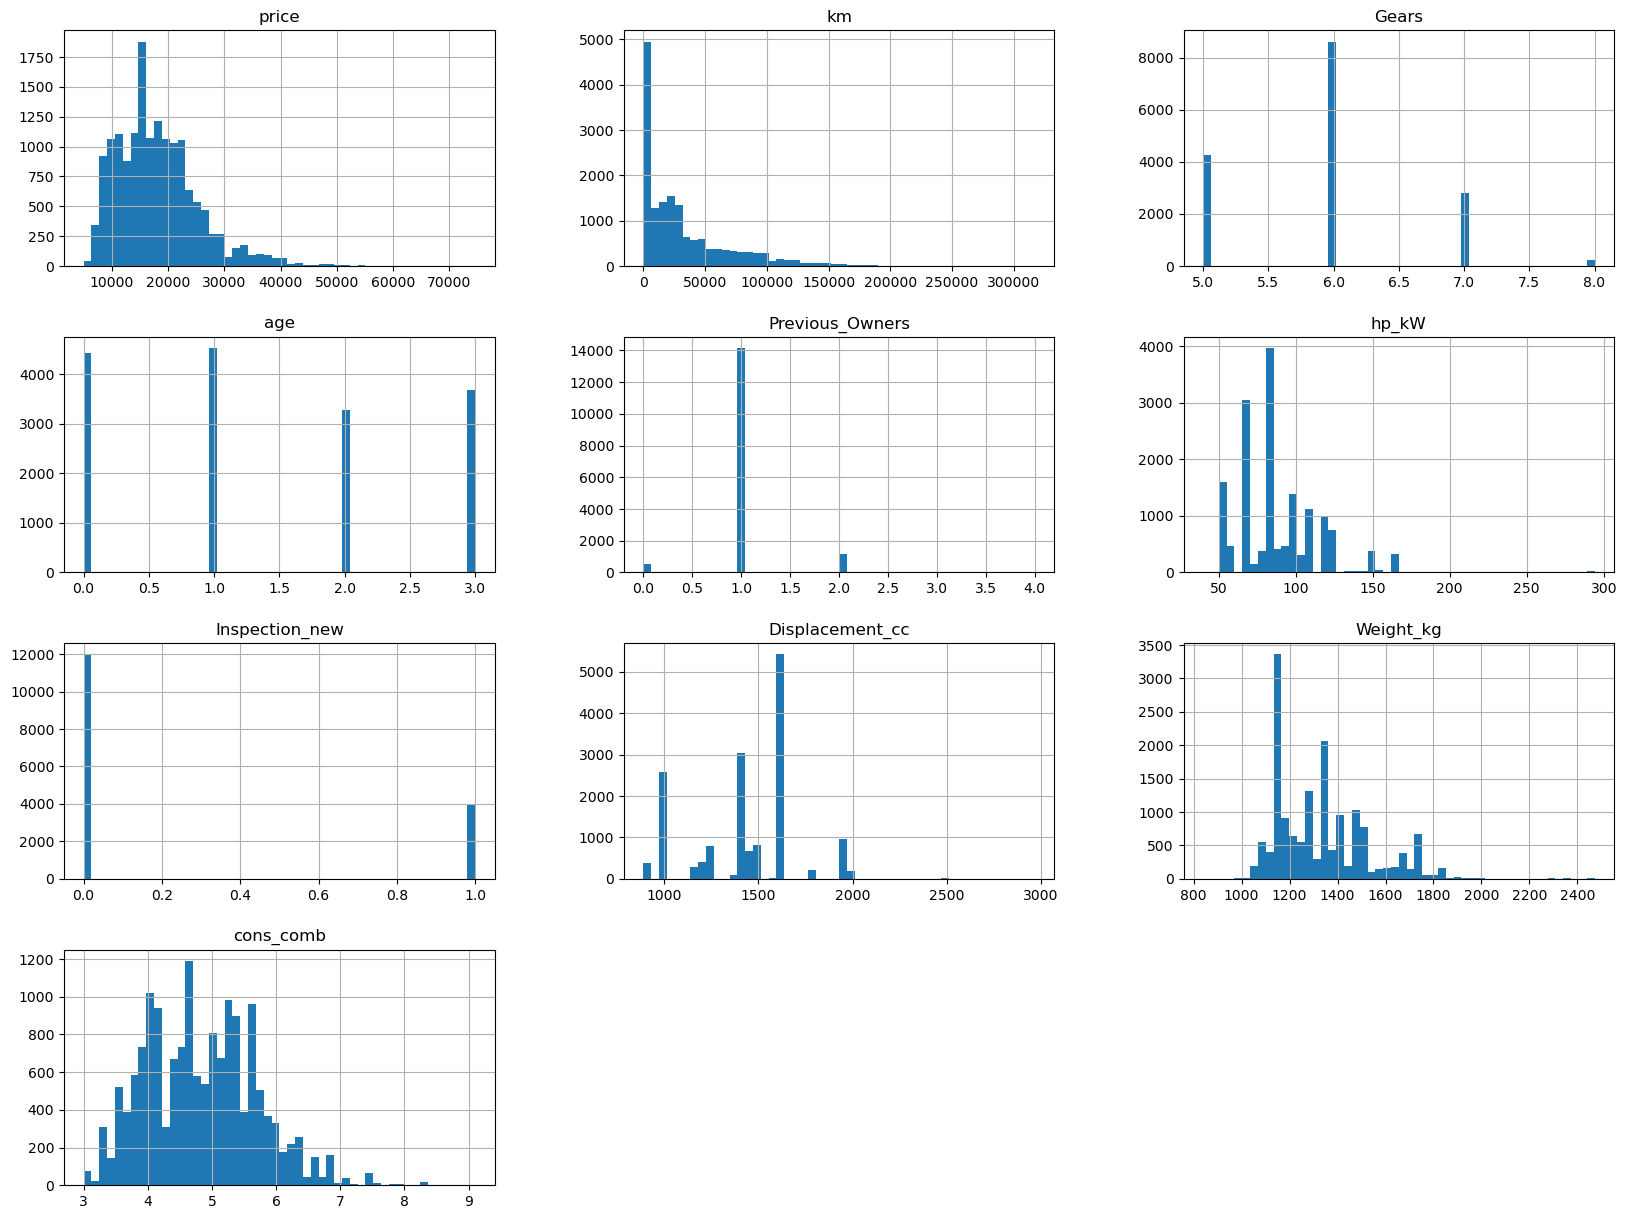

In [21]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: >

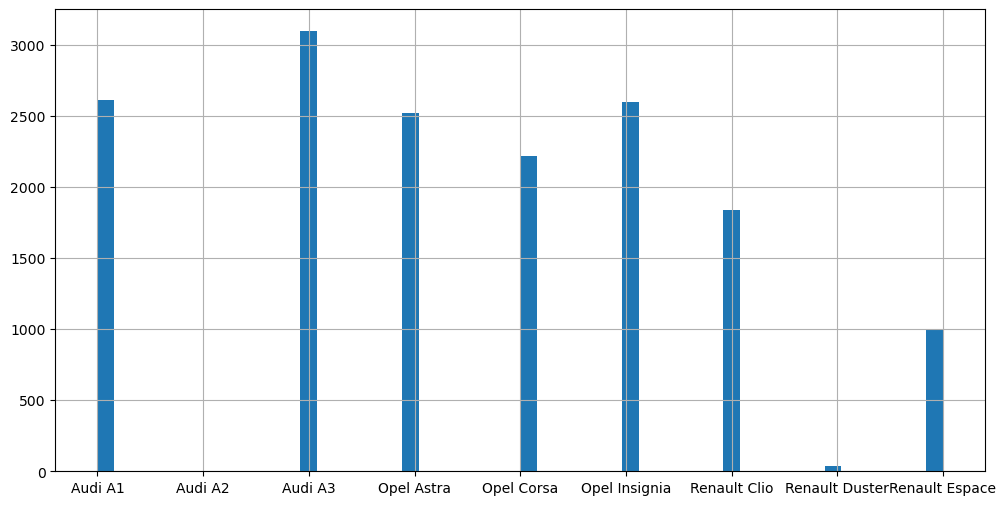

In [22]:
data["make_model"].hist(bins=50, figsize=(12, 6))

## Sampling
Variabili chiave per la stratificazione

Sulla base di questa analisi, si è deciso di stratificare queste variabili:

   * make_model: Per preservare la rappresentazione di tutti i modelli di auto.
      * Molto importante. Ha categorie sbilanciate e rappresenta modelli di veicoli. Stratifica per preservare tutti         modelli.
  * body_type: Per garantire che tutti i tipi di carrozzeria siano proporzionalmente rappresentati.
       * Importante. Contiene diverse tipologie di carrozzeria (es. Sedans, Coupe) con alcune classi rare che devono essere incluse.
  * Type: Per mantenere le proporzioni tra "Used", "New", "Demonstration", ecc.
       * Molto importante. Categorie come "Used", "New", "Demonstration" sono rilevanti e sbilanciate.
  * Fuel: Per includere categorie rare come "Electric" o "LPG/CNG".
      Importante. Contiene classi rare come "Electric" o "LPG/CNG" che devono essere preservate.
  * Drive_chain: Per garantire che tipi di trazione rari (es. "4WD") siano inclusi.
      Importante. Include classi come "front", "4WD", che sono rilevanti e devono essere preservate.

      valurae se fare anche eta e kilometraggio ovviamnte vanno prima gategorizzate 

<Axes: xlabel='price', ylabel='km'>

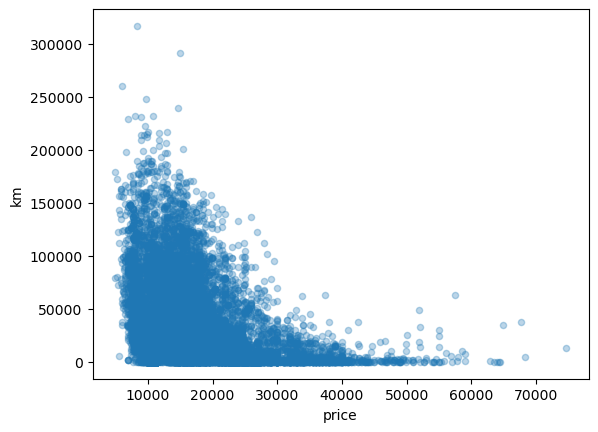

In [23]:
data.plot(kind="scatter", x="price", y="km", alpha=0.3)


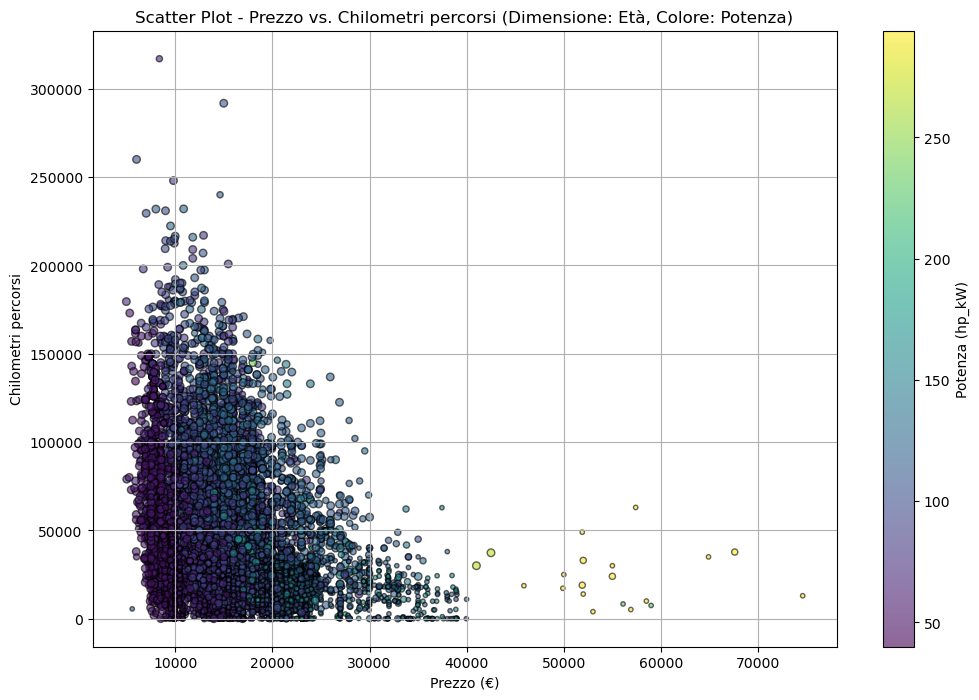

In [24]:


# Scatter plot con prezzo e km percorsi, dimensione punti basata sull'età e colore basato sulla potenza
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data["price"], data["km"], 
                       alpha=0.6, 
                       s=data["age"]*10,  # Dimensione proporzionale all'età
                       c=data["hp_kW"],   # Colore proporzionale alla potenza
                       cmap="viridis",    # Colormap Viridis
                       edgecolor='k')

# Aggiungere barra dei colori e titolo
plt.colorbar(scatter, label="Potenza (hp_kW)")
plt.xlabel("Prezzo (€)")
plt.ylabel("Chilometri percorsi")
plt.title("Scatter Plot - Prezzo vs. Chilometri percorsi (Dimensione: Età, Colore: Potenza)")
plt.grid(True)
plt.show()


In [25]:
corr_matrix = data.corr(numeric_only=True)

In [26]:
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
hp_kW              0.696411
Gears              0.530291
Weight_kg          0.468433
Displacement_cc    0.281824
cons_comb          0.272261
Inspection_new     0.008180
Previous_Owners   -0.144628
km                -0.399291
age               -0.473478
Name: price, dtype: float64

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='km', ylabel='price'>,
        <Axes: xlabel='age', ylabel='price'>,
        <Axes: xlabel='hp_kW', ylabel='price'>,
        <Axes: xlabel='Displacement_cc', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='km'>,
        <Axes: xlabel='km', ylabel='km'>,
        <Axes: xlabel='age', ylabel='km'>,
        <Axes: xlabel='hp_kW', ylabel='km'>,
        <Axes: xlabel='Displacement_cc', ylabel='km'>],
       [<Axes: xlabel='price', ylabel='age'>,
        <Axes: xlabel='km', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='hp_kW', ylabel='age'>,
        <Axes: xlabel='Displacement_cc', ylabel='age'>],
       [<Axes: xlabel='price', ylabel='hp_kW'>,
        <Axes: xlabel='km', ylabel='hp_kW'>,
        <Axes: xlabel='age', ylabel='hp_kW'>,
        <Axes: xlabel='hp_kW', ylabel='hp_kW'>,
        <Axes: xlabel='Displacement_cc', ylabel='hp_kW'>],
       [<Axes: xlabel='price', ylabel='Di

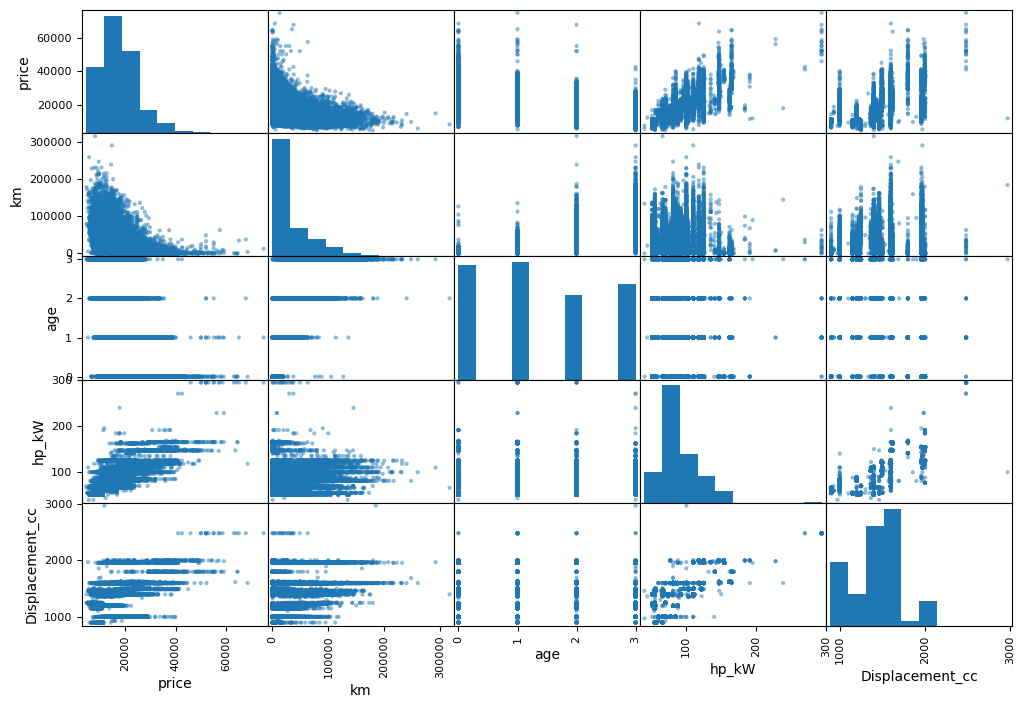

In [27]:


attributes = ["price", "km", "age", "hp_kW", "Displacement_cc"]
    
scatter_matrix(data[attributes], figsize=(12, 8))

Si definiscono le feature X e la variabile target y

## Controlllo se ci sono valori vuoti

In [28]:
# Conta i valori mancanti per ogni colonna
missing_per_column = data.isnull().sum()

# Mostra solo le colonne con valori mancanti
missing_with_values = missing_per_column[missing_per_column > 0]
print(missing_with_values)


Series([], dtype: int64)


In [29]:

# 2. Definisci le feature (X) e la variabile target (y)
X = data.drop(columns=['price'])  # Feature: tutte le colonne tranne 'price'
y = data['price']  # Target: la colonna 'price'

### Normalizzazione delle feature


1. Range di Valori Diversi: Gli attributi come price, km, hp_kW (potenza in kilowatt), e Weight_kg (peso in kilogrammi) hanno range di valori molto diversi tra loro. Ad esempio, i prezzi delle auto possono variare di decine di migliaia di euro, mentre i valori di Gears (marce) sono generalmente in una scala da 5 a 9. Questa diversità nei range di valori può portare gli algoritmi di machine learning a pesare in modo improprio gli attributi con valori più alti, anche se non sono necessariamente più informativi.

2. Unità di Misura: Gli attributi come Displacement_cc (cilindrata in cc) e cons_comb (consumo combinato in litri/100 km) sono misurati in unità completamente diverse. Normalizzando questi valori, eliminiamo l'influenza delle unità di misura sul processo di apprendimento.

3. Facilità di Apprendimento: La maggior parte degli algoritmi di machine learning (come quelli basati su gradient descent) convergono più velocemente quando le feature sono su scale simili. La normalizzazione aiuta a prevenire problemi legati alla velocità di apprendimento e alla stabilità dell'algoritmo.

4. Trattamento Uniforme delle Feature: Le feature binarie come Previous_Owners, che tipicamente hanno valori 0 o 1, possono essere ingiustamente influenzate se confrontate con feature su scale molto più ampie. Normalizzandole tutte allo stesso range, ciascuna feature ha la stessa possibilità di influenzare l'apprendimento del modello.

Range Oscillanti dei Valori Normalizzati: Dopo la normalizzazione, tutti questi attributi oscillano tra 0 e 1:

0: Corrisponde al valore minimo presente nel dataset per quell'attributo.

1: Corrisponde al valore massimo presente nel dataset per quell'attributo.
Questo significa che qualsiasi valore intermedio può essere interpretato come una frazione del range totale di quel particolare attributo, rendendo i dati più omogenei e comparabili tra di loro.

Se desideri dettagli più specifici su questi range o ulteriori analisi, sono qui per assisterti!

In definitiva, poiché i valori di feature diverse risultano essere relativamente distanti tra loro (con qualche ordine di grandezza di differenza), è opportuno effettuare una normalizzazione delle feature. \
In particolare, verrà adottata una normalizzazione che riporterà i valori di tutte le feature all'interno dell'intervallo [0, 1], dove 0 corrisponde al valore minimo assunto da ciascuna feature, mentre 1 corrisponde al valore massimo. \
Sia $x$ il valore originale di una particolare feature $f$, sia $x'$ il valore ottenuto a seguito della normalizzazione e siano $min$, $max$ rispettivamente il valore minimo e il valore massimo assunti dalla feature f all'interno del data set. Allora, la normalizzazione avviene secondo la seguente formula:

$$ x' = \frac{x-min}{max-min} $$

In [30]:
# Mostra le statistiche prima della normalizzazione

# Definisci le colonne numeriche che vuoi normalizzare
numeric_cols = ['price', 'km', 'hp_kW', 'Displacement_cc', 'Weight_kg', 'cons_comb']

print("Prima della normalizzazione:")
display(data[numeric_cols].describe())

# Applica la normalizzazione
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Mostra le statistiche dopo la normalizzazione
print("Dopo la normalizzazione:")
display(data[numeric_cols].describe())

Prima della normalizzazione:


,price,km,hp_kW,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,88.499340,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,26.674341,275.804272,199.682385,0.867530
min,4950.000000,0.000000,40.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,66.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,85.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,103.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,294.000000,2967.000000,2471.000000,9.100000


Dopo la normalizzazione:


,price,km,hp_kW,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,0.187715,0.101230,0.190942,0.259346,0.305151,0.300348
std,0.105982,0.116647,0.105017,0.132790,0.122429,0.142218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.113424,0.006058,0.102362,0.163216,0.199264,0.180328
50%,0.171572,0.064394,0.177165,0.274916,0.278970,0.295082
75%,0.243360,0.147950,0.248031,0.340876,0.387492,0.393443
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X_encoded = pd.get_dummies(X, drop_first=True)

### Suddivisione del data set in training+validation set e testing set
Quando si valuta un modello di Machine Learning, l'intero data set deve essere scomposto in 3 parti:
* **training set**: porzione del data set utilizzata per addestrare il modello;
* **validation set**: porzione del data set utilizzata per stabilire quali sono i valori degli iperparametri che portano il modello ad avere le prestazioni migliori.
* **testing set**: porzione del data set utilizzata per effettuare le predizioni, confrontare il valore vero col valore predetto del target di ciascun elemento e calcolare le prestazioni e la qualità del modello.

Stando alla documentazione di Sklearn, il data set viene tipicamente suddiviso secondo il seguente schema:
* Si ha una prima suddivisione statica in training+validation set e testing set: circa il 70-80% delle istanze andrebbe nel training+validation set, mentre il restante 20-30% andrebbe nel testing set. 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Valutazione dei modelli di Machine Learning per la classificazione

Gli algoritmi di Machine Learning di classificazione che verranno confrontati sul data set sono elencati qui di seguito:
* Modelli di Regressione Basati su Alberi
   * Random Forest Regressor
   * Gradient Boosting Regressor (GBR)
   * XGBoost
* Regresssioni lineari
  * Regressione Lineare Multipla
  *  Regressione Polinomiale
  *  Elastic Net (o Ridge/Lasso)
* Modelli Basati su Reti Neurali
    * Multi-Layer Perceptron (MLP)
* k-Nearest Neighbors (kNN)
* Approcci Bayesiani
    * Gaussian Process Regression
* Transformer

##### Per confrontare la bontà e le prestazioni di questi algoritmi, si ricorre alle seguenti metriche:
* MAE (Utile quando vuoi un’interpretazione semplice dell’errore medio.)
* MSE (Utile quando vuoi dare peso maggiore agli errori grandi)
* RMSE (Utile per interpretare l’errore medio in unità del target)
* R^2 Score (Per confrontare modelli e valutare la qualità complessiva del fit.)

##### Tecniche di Validazione tlizzata:
* Cross Validation


## Funzioni ausiliare

Funzione per l ottimizzazione dei parametri

In [33]:


def fine_tuning(model, param_grid, X_train, y_train, cv):
   
    # Esecuzione di GridSearchCV con Cross Validation
    grid_search = GridSearchCV(
        estimator=model,   # Ora possiamo passare qualsiasi modello
        param_grid=param_grid,
        cv=cv,  
        scoring='neg_mean_squared_error',  # Ottimizziamo MSE
        return_train_score=True,
        n_jobs=-1
    )

    print("🚀 Inizio Fine-Tuning con Grid Search...")

    # Addestramento SOLO sul training set
    grid_search.fit(X_train, y_train)

    # Recupero del miglior modello trovato
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print("\n🏆 Migliori iperparametri trovati:", best_params)

    # Dizionario per salvare i risultati
    results_dict = {
        "params": [],
        "R2": [],
        "MAE": [],
        "MSE": [],
        "RMSE": []
    }

    # Stampa dei risultati della Grid Search e salvataggio nel dizionario
    cv_results = grid_search.cv_results_

    print("\n📊 Risultati della Cross Validation:")
    for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
        # Addestramento del modello con i parametri specifici
        tuned_model = model.__class__(**params)  # Usa la stessa classe del modello passato come argomento
        tuned_model.fit(X_train, y_train)
        predictions = tuned_model.predict(X_train)

        # Calcolo metriche
        r2 = r2_score(y_train, predictions)
        mae = mean_absolute_error(y_train, predictions)
        mse = mean_squared_error(y_train, predictions)
        rmse = np.sqrt(mse)

        # Salvataggio nel dizionario
        results_dict["params"].append(params)
        results_dict["R2"].append(r2)
        results_dict["MAE"].append(mae)
        results_dict["MSE"].append(mse)
        results_dict["RMSE"].append(rmse)

        # Stampa delle metriche
        print(f"RMSE: {rmse:.2f} - Parametri: {params}")

    # Creazione di un DataFrame dai risultati
    df_results = pd.DataFrame(results_dict)

    # Stampa metriche del miglior modello sul Training Set
    train_predictions = best_model.predict(X_train)
    train_r2 = r2_score(y_train, train_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = np.sqrt(train_mse)

    print("\n📈 Metriche del miglior modello sul Training Set:")
    print(f"✅ R² Score: {train_r2:.4f}")
    print(f"✅ Mean Absolute Error (MAE): {train_mae:.2f}")
    print(f"✅ Mean Squared Error (MSE): {train_mse:.2f}")
    print(f"✅ Root Mean Squared Error (RMSE): {train_rmse:.2f}")

    return best_model, df_results  # Restituisce il miglior modello e i risultati della cross-validation



def cross_validate_model(model, X_train, y_train, cv):
  

    # Eseguire la Cross-Validation per tutte le metriche contemporaneamente
    cv_results = cross_validate(
        model, X_train, y_train, 
        scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error"], 
        cv=cv, n_jobs=-1, return_train_score=False
    )

    # Calcolare media e deviazione standard per ogni metrica
    results = {
        "CV_R2_Mean": np.mean(cv_results["test_r2"]),
        "CV_R2_Std": np.std(cv_results["test_r2"]),
        "CV_MAE_Mean": -np.mean(cv_results["test_neg_mean_absolute_error"]),
        "CV_MAE_Std": np.std(cv_results["test_neg_mean_absolute_error"]),
        "CV_MSE_Mean": -np.mean(cv_results["test_neg_mean_squared_error"]),
        "CV_MSE_Std": np.std(cv_results["test_neg_mean_squared_error"]),
        "CV_RMSE_Mean": np.mean(np.sqrt(-cv_results["test_neg_mean_squared_error"])),
        "CV_RMSE_Std": np.std(np.sqrt(-cv_results["test_neg_mean_squared_error"]))
    }

    # Stampare i risultati
    print("\n📊 Risultati Cross-Validation:")
    print(f"   R² Medio: {results['CV_R2_Mean']:.4f} ± {results['CV_R2_Std']:.4f}")
    print(f"   MAE Medio: {results['CV_MAE_Mean']:.4f} ± {results['CV_MAE_Std']:.4f}")
    print(f"   MSE Medio: {results['CV_MSE_Mean']:.4f} ± {results['CV_MSE_Std']:.4f}")
    print(f"   RMSE Medio: {results['CV_RMSE_Mean']:.4f} ± {results['CV_RMSE_Std']:.4f}")

    return results





def cross_validate_xgboost(params, X_train, y_train, cv=5, num_boost_round=100, early_stopping_rounds=10):
   

    #Convertire i dati in formato DMatrix per XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)

    #Eseguire la Cross-Validation con XGBoost
    cv_results = xgb.cv(
        params=params,
        dtrain=dtrain,
        num_boost_round=num_boost_round,
        nfold=cv,
        metrics=["rmse", "mae"],  # XGBoost non calcola direttamente R² e MSE, quindi lo faremo manualmente
        early_stopping_rounds=early_stopping_rounds,
        seed=42
    )

    #Estrarre RMSE e MAE finali
    mean_rmse = cv_results["test-rmse-mean"].iloc[-1]
    std_rmse = cv_results["test-rmse-std"].iloc[-1]
    mean_mae = cv_results["test-mae-mean"].iloc[-1]
    std_mae = cv_results["test-mae-std"].iloc[-1]

    #Calcolare MSE manualmente (MSE = RMSE^2)
    mean_mse = mean_rmse ** 2
    std_mse = (std_rmse ** 2)

    #Calcolare R² manualmente
    total_variance = np.var(y_train)  # Varianza totale del target
    mean_r2 = 1 - (mean_mse / total_variance)  # Formula R² = 1 - (MSE / Varianza Totale)

    results = {
        "CV_RMSE_Mean": mean_rmse,
        "CV_RMSE_Std": std_rmse,
        "CV_MAE_Mean": mean_mae,
        "CV_MAE_Std": std_mae,
        "CV_MSE_Mean": mean_mse,
        "CV_MSE_Std": std_mse,
        "CV_R2_Mean": mean_r2  # XGBoost non calcola direttamente R², quindi lo deriviamo da MSE
    }

    #Stampare i risultati
    print("\n📊 Risultati Cross-Validation con XGBoost:")
    print(f"   RMSE Medio: {results['CV_RMSE_Mean']:.4f} ± {results['CV_RMSE_Std']:.4f}")
    print(f"   MAE Medio: {results['CV_MAE_Mean']:.4f} ± {results['CV_MAE_Std']:.4f}")
    print(f"   MSE Medio: {results['CV_MSE_Mean']:.4f} ± {results['CV_MSE_Std']:.4f}")
    print(f"   R² Medio: {results['CV_R2_Mean']:.4f}")

    return results

  



def manual_cross_validation_single_model(model, X_train, y_train, n_splits=5):
  
    # ✅ Converte i dati in array NumPy con tipo float32
    X_train = np.array(X_train).astype('float32')
    y_train = np.array(y_train).astype('float32')

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Salva i pesi iniziali del modello
    initial_weights = model.get_weights()

    r2_scores = []
    mae_scores = []
    mse_scores = []
    rmse_scores = []

    for train_idx, val_idx in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        # ✅ Resetta i pesi del modello ai pesi iniziali
        model.set_weights(initial_weights)

        # Addestra il modello sui dati del fold corrente
        model.fit(X_train_fold, y_train_fold, epochs=80, batch_size=32,validation_data=[X_val_fold,y_val_fold],callbacks=[tensorboard_callback] ,verbose=1)

        # Fai previsioni
        y_pred = model.predict(X_val_fold)

        # Calcola le metriche
        r2 = r2_score(y_val_fold, y_pred)
        mae = mean_absolute_error(y_val_fold, y_pred)
        mse = mean_squared_error(y_val_fold, y_pred)
        rmse = np.sqrt(mse)

        # Memorizza i risultati
        r2_scores.append(r2)
        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)

        # 📊 Stampa i risultati per ogni fold
        print("\n📊 Metriche di Performance per questo Fold:")
        print(f"   R²: {r2:.4f}")
        print(f"   MAE: {mae:.4f}")
        print(f"   MSE: {mse:.4f}")
        print(f"   RMSE: {rmse:.4f}")


        # 📊 Calcola la media delle metriche su tutti i fold
        results = {
            "Mean R²": np.mean(r2_scores),
            "Mean MAE": np.mean(mae_scores),
            "Mean MSE": np.mean(mse_scores),
            "Mean RMSE": np.mean(rmse_scores),
        }
    
        # Stampa i risultati finali
        print("\n📈 Risultati Finali della Cross-Validation:")
        for metric, value in results.items():
            print(f"   {metric}: {value:.4f}")
    
    return results




def test_model_on_training(model, X_train, y_train, n_samples):
   

    #Selezionare n_samples righe casuali dal Training Set
    sample_data = X_train.sample(n=n_samples, random_state=None)
    sample_labels = y_train.loc[sample_data.index]

       # Addestra il modello sui dati di training
    if isinstance(model, tf.keras.models.Sequential):  # Verifica se il modello è di tipo MLP
        model.fit(X_train, y_train, epochs=300, batch_size=150, callbacks=[tensorboard_callback], verbose=1)
   

    

    #  Fare previsioni sul training set
    sample_predictions = model.predict(sample_data)

    # Calcolare le metriche
    r2 = r2_score(sample_labels, sample_predictions)
    mae = mean_absolute_error(sample_labels, sample_predictions)
    mse = mean_squared_error(sample_labels, sample_predictions)
    rmse = np.sqrt(mse)

        # Definisci il percorso dei log per TensorBoard
   # log_dir = "logs/scikit-learn/" + datetime.now().strftime("%Y%m%d-%H%M%S")
    
    # Crea il file writer per TensorBoard
    #writer = tf.summary.create_file_writer(log_dir)
    
    
  #
  #   with writer.as_default():
    #    tf.summary.scalar("Mean Squared Error", mse, step=1)
    #    tf.summary.scalar("Mean Absolute Error", mae, step=1)
     #   tf.summary.scalar("R² Score", r2, step=1)

    # Stampare i risultati
    print("\n📊 Confronto Predizioni vs Valori Reali (Training Set):\n")
    for i in range(n_samples):
        print(f"Sample {i+1}:")
        print(f"   ✅ Valore Reale: {sample_labels.iloc[i]}")
        print(f"   🔮 Predizione: {sample_predictions[i].item():.4f}\n")

    print("\n📊 Metriche di Performance sul Training Set:")
    print(f"   R²: {r2:.4f}")
    print(f"   MAE: {mae:.4f}")
    print(f"   MSE: {mse:.4f}")
    print(f"   RMSE: {rmse:.4f}")

    # 📌 Restituire un dizionario con le metriche
    return {
        "r2": r2,
        "mae": mae,
        "mse": mse,
        "rmse": rmse
    }


In [34]:

%load_ext tensorboard

%tensorboard --logdir logs/scikit-learn/ --host localhost --port 8081

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [57]:
#dichiarazione di un dizionario che conterrà le coppie {MAE,MSE,RMSE,R^2}
#relative alle predizioni effettuate dal classificatore migliore (wrt iperparametri) per ciascun modello, dove le
#predizioni vengono fatte sul testing set a seguito di un addestramento effettuato sul training+validation set
dizionario_result={}
dizionario_result_Cross={}



## Plotting dei Grafici

Funzione per l ottimizzazione dei parametri

In [36]:
def plot_combined_metrics_fixed(metrics_df, fixed_param, fixed_value, varying_param, title_prefix):
  
    metrics = ["MAE", "MSE", "R2"]  # Le metriche da plottare
    
    # Filtra il DataFrame per il parametro fisso
    filtered_df = metrics_df[metrics_df[fixed_param] == fixed_value]
    
    plt.figure(figsize=(5, 4))
    for metric in metrics:
        plt.plot(filtered_df[varying_param], filtered_df[metric], marker="o", label=metric)
    
    plt.title(f"{title_prefix}: Confronto MAE, MSE, R2 (fissato {fixed_param}={fixed_value})")
    plt.xlabel(varying_param)
    plt.ylabel("Metric Value")
    plt.legend()
    plt.grid(True)
    plt.show()



def PlottingValori(y_test, y_pred, title="Valori Reali vs Valori Predetti"):
   
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, s=4)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonale ideale
    plt.xlabel("Valori Reali")
    plt.ylabel("Valori Predetti")
    plt.title(title)
    plt.grid(True)
    plt.show()




## Random Forest Regressor

In [60]:
# Inizializzazione del classificatore Random Forest
RFR = RandomForestRegressor(random_state=42)
RFR.fit(X_train, y_train)

dizionario_result["RFR"]=test_model_on_training(RFR,X_train,y_train,5)




📊 Confronto Predizioni vs Valori Reali (Training Set):

Sample 1:
   ✅ Valore Reale: 10400
   🔮 Predizione: 11765.2300

Sample 2:
   ✅ Valore Reale: 37990
   🔮 Predizione: 40697.5343

Sample 3:
   ✅ Valore Reale: 8300
   🔮 Predizione: 8509.7000

Sample 4:
   ✅ Valore Reale: 9750
   🔮 Predizione: 9822.4000

Sample 5:
   ✅ Valore Reale: 14840
   🔮 Predizione: 15041.0600


📊 Metriche di Performance sul Training Set:
   R²: 0.9849
   MAE: 911.1849
   MSE: 1856847.1670
   RMSE: 1362.6618


In [ ]:
#Random Forest con cross validation
dizionario_result_Cross["RFR"]=cross_validate_model(RFR,X_train,y_train,5)


In [ ]:
#Definizione della griglia di ricerca per il fine-tuning
param_grid = {
    'n_estimators': [50, 100,150],         # Solo 100 alberi per ridurre il tempo di training
    'max_depth': [10, 20,30],         # Evita `None` per ridurre il rischio di overfitting
    'min_samples_split': [5],      # Mantieni un valore più conservativo
    'min_samples_leaf': [1],       # Non ha un grande impatto, quindi usiamo solo 1
    'max_features': ['sqrt'],      # Evita `None` per ridurre la complessità
}


fine_tuning(RFR,param_grid,X_train,y_train,3)



## XGBoost

In [61]:

XGB = XGBRegressor(random_state=42)
XGB.fit(X_train, y_train)

dizionario_result["XGB"]=test_model_on_training(XGB,X_train,y_train,5)



📊 Confronto Predizioni vs Valori Reali (Training Set):

Sample 1:
   ✅ Valore Reale: 17000
   🔮 Predizione: 17810.1562

Sample 2:
   ✅ Valore Reale: 8590
   🔮 Predizione: 9207.0459

Sample 3:
   ✅ Valore Reale: 25500
   🔮 Predizione: 25668.2266

Sample 4:
   ✅ Valore Reale: 15492
   🔮 Predizione: 16641.7461

Sample 5:
   ✅ Valore Reale: 8300
   🔮 Predizione: 7985.1772


📊 Metriche di Performance sul Training Set:
   R²: 0.9876
   MAE: 611.9995
   MSE: 497285.6562
   RMSE: 705.1848


In [ ]:
#XGB con cross validation
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "max_depth": 4,
    "eta": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}
dizionario_result_Cross["XGB"]=cross_validate_xgboost(params,X_train,y_train,3)

In [ ]:
#Fine TUring


# Definizione della griglia di ricerca per il fine-tuning
param_grid = {
    'n_estimators': [50, 100, 200],         # Numero di alberi nel modello
    'max_depth': [3, 5, 10, 15],            # Profondità massima degli alberi
    'learning_rate': [0.01, 0.1, 0.2],      # Tasso di apprendimento
    'subsample': [0.7, 0.9, 1.0],           # Percentuale di dati usati per ogni albero
    'colsample_bytree': [0.5, 0.75, 1.0],   # Percentuale di feature considerate per ogni split
    'gamma': [0, 0.1, 0.3],                 # Controlla la complessità del modello
    'reg_lambda': [1, 5, 10],               # Regolarizzazione L2
    'reg_alpha': [0, 0.1, 1],               # Regolarizzazione L1
}

dizionario_result["XGB"]fine_tuning(XGB,param_grid,X_train,y_train,3)



## Regressore Gradient Boosting

In [62]:
# Inizializza il regressore Gradient Boosting
GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(X_train, y_train)

dizionario_result["GBR"]=test_model_on_training(GBR,X_train,y_train,5)


📊 Confronto Predizioni vs Valori Reali (Training Set):

Sample 1:
   ✅ Valore Reale: 40989
   🔮 Predizione: 36393.2847

Sample 2:
   ✅ Valore Reale: 19800
   🔮 Predizione: 19336.6729

Sample 3:
   ✅ Valore Reale: 15450
   🔮 Predizione: 16712.1082

Sample 4:
   ✅ Valore Reale: 19950
   🔮 Predizione: 20345.9391

Sample 5:
   ✅ Valore Reale: 18790
   🔮 Predizione: 19240.6163


📊 Metriche di Performance sul Training Set:
   R²: 0.9443
   MAE: 1433.5412
   MSE: 4657602.2236
   RMSE: 2158.1479


In [ ]:
#GBR con cross validation
dizionario_result["GBR"]=cross_validate_model(GBR,X_train,y_train,5)

In [ ]:


param_grid = {
    'n_estimators': [50, 100],         # Ridotto il numero di alberi
    'max_depth': [3, 5, 10],           # Evitato 15 per ridurre overfitting
    'learning_rate': [0.05, 0.1],      # 0.05 e 0.1 sono scelte più bilanciate
    'subsample': [0.8, 1.0],           # Evitato 0.7 per avere più dati per albero
    'min_samples_split': [5, 10],      # Evitato 2 per ridurre overfitting
    'min_samples_leaf': [1, 2],        # Evitato 4 per modelli più leggeri
    'max_features': ['sqrt', 'log2'],  # Evitato None per ridurre complessità
}

# Esegui il fine-tuning
fine_tuning(GBR, param_grid, X_train, y_train, 5)





## Linear Regression

In [63]:
lin_reg = LinearRegression()
print(X_train.shape)
lin_reg.fit(X_train, y_train)


dizionario_result["lin_reg"]=test_model_on_training(lin_reg,X_train,y_train,5)

(12732, 11678)

📊 Confronto Predizioni vs Valori Reali (Training Set):

Sample 1:
   ✅ Valore Reale: 19900
   🔮 Predizione: 19900.0000

Sample 2:
   ✅ Valore Reale: 10500
   🔮 Predizione: 10500.0000

Sample 3:
   ✅ Valore Reale: 27500
   🔮 Predizione: 25556.6099

Sample 4:
   ✅ Valore Reale: 24950
   🔮 Predizione: 24950.0000

Sample 5:
   ✅ Valore Reale: 10990
   🔮 Predizione: 12595.6041


📊 Metriche di Performance sul Training Set:
   R²: 0.9740
   MAE: 709.7988
   MSE: 1270945.9299
   RMSE: 1127.3624


In [ ]:
#cross validation
dizionario_result_Cross["LRN"]=cross_validate_model(lin_reg,X_train,y_train,5)

In [ ]:
#Fine turing
param_grid = {
    "fit_intercept": [True, False],  # Se includere l'intercetta
    "positive": [True, False],       # Se forzare coefficienti positivi
}
fine_tuning(lin_reg,param_grid,X_train,y_train,3)

## Elastic Net 

In [64]:

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42) 
elastic_net.fit(X_train, y_train)
dizionario_result["elastic_net"]=test_model_on_training(elastic_net,X_train,y_train,5)


📊 Confronto Predizioni vs Valori Reali (Training Set):

Sample 1:
   ✅ Valore Reale: 8990
   🔮 Predizione: 11871.5296

Sample 2:
   ✅ Valore Reale: 20900
   🔮 Predizione: 21553.4409

Sample 3:
   ✅ Valore Reale: 18450
   🔮 Predizione: 16920.1025

Sample 4:
   ✅ Valore Reale: 15090
   🔮 Predizione: 16466.4254

Sample 5:
   ✅ Valore Reale: 11295
   🔮 Predizione: 14776.1597


📊 Metriche di Performance sul Training Set:
   R²: 0.7402
   MAE: 1984.4906
   MSE: 5016760.7698
   RMSE: 2239.8127


In [ ]:
#Cross VALIDATION
dizionario_result_Cross["ELN"]=cross_validate_model(elastic_net,X_train,y_train,5)

## MLP

In [65]:

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)


model = keras.Sequential([
   
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Primo layer denso con 128 neuroni e ReLU
    layers.LayerNormalization(),
    layers.Dense(1, activation='relu')
   
])

# Definisci il learning rate desiderato
learning_rate = 0.01  # Modifica questo valore se necessario

# Crea l'ottimizzatore con il learning rate personalizzato
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])



print(X_train.shape)
dizionario_result["MLP"]=test_model_on_training(model,X_train,y_train,5)



(12732, 11678)
Epoch 1/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 381477664.0000 - mae: 18078.3926
Epoch 2/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 374419520.0000 - mae: 17899.6973
Epoch 3/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 365374880.0000 - mae: 17575.1934
Epoch 4/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 337363136.0000 - mae: 16842.6250
Epoch 5/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 310168096.0000 - mae: 15988.7803
Epoch 6/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 277008800.0000 - mae: 14969.8447
Epoch 7/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 246768720.0000 - mae: 13859.6924
Epoch 8/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 216116288.0000 - mae: 12622.3203
Epoch 9/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181114640.0000 - mae: 11182.8682
Epoch 10/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 146032080.0000 - mae: 9669.7881
Epoch 11/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12571

In [ ]:
# Converte i dati in array NumPy con tipo float32
X_train = X_train.values.astype('float32')
y_train = np.array(y_train, dtype='float32')  # Se y_train è una Series Pandas

# Controlla valori non numerici e sostituisci NaN
X_train = np.nan_to_num(X_train, nan=np.mean(X_train))
y_train = np.nan_to_num(y_train, nan=np.mean(y_train))

# Verifica che y_train sia 1D
if len(y_train.shape) > 1:
    y_train = y_train.ravel()

dizionario_result_Cross["MLP"] = manual_cross_validation_single_model(model, X_train, y_train,5)


## KNN

In [66]:
from datetime import datetime
k = 5  # Numero di vicini
knn_regressor = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='minkowski', p=2)
knn_regressor.fit(X_train, y_train)
dizionario_result["KNN"]=test_model_on_training(knn_regressor,X_train,y_train,5)




📊 Confronto Predizioni vs Valori Reali (Training Set):

Sample 1:
   ✅ Valore Reale: 15490
   🔮 Predizione: 15490.0000

Sample 2:
   ✅ Valore Reale: 17950
   🔮 Predizione: 16974.0000

Sample 3:
   ✅ Valore Reale: 20009
   🔮 Predizione: 18579.8000

Sample 4:
   ✅ Valore Reale: 17999
   🔮 Predizione: 20359.6000

Sample 5:
   ✅ Valore Reale: 20750
   🔮 Predizione: 16436.0000


📊 Metriche di Performance sul Training Set:
   R²: -0.6049
   MAE: 1815.9600
   MSE: 5435643.4000
   RMSE: 2331.4466


In [ ]:
#Cross VALIDATION
dizionario_result_Cross["KNN"]=cross_validate_model(knn_regressor,X_train,y_train,5)

In [ ]:
param_grid = {
    "n_neighbors": [2, 3],  # Numero di vicini da considerare
  
}
fine_tuning(knn_regressor,param_grid,X_train,y_train,3)

## Transofrmer

In [69]:

#Standardizzazione delle feature numeriche
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

#Creazione del DataFrame finale con la variabile target inclusa
train_df = X_scaled.copy()
train_df["price"] = y.reset_index(drop=True)

#Definizione delle feature
feature_names = list(X_encoded.columns)  # Feature dopo one-hot encoding

#Configurazione dei dati per il modello
data_config = DataConfig(
    target=["price"],
    continuous_cols=feature_names,  # Tutte le feature sono numeriche
    categorical_cols=[],  # Nessuna colonna categorica dopo il one-hot encoding
)

model_config = CategoryEmbeddingModelConfig(
    task="regression",
    metrics=["r2_score", "mean_absolute_error"],
    layers="1024-512-256",  # Aumenta il numero di neuroni per una maggiore capacità di apprendimento
    dropout=0.2,  # Aggiungi dropout per prevenire overfitting
    use_batch_norm=True,  # Normalizzazione batch per stabilizzare il training
)
    
import torch
print("GPU Disponibile:", torch.cuda.is_available())
print("Numero di GPU:", torch.cuda.device_count())
print("Nome GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Nessuna GPU trovata")

import torch
print(torch.__version__)  # Controlla che sia una versione con CUDA supportato




optimizer_config = OptimizerConfig(
        optimizer="AdamW",             
)

trainer_config = TrainerConfig(
    max_epochs=300,
   
)
                               

# 📌 1️⃣1️⃣ Creazione del modello
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

#ddestramento del modello SOLO sul training set
tabular_model.fit(train=train_df)

# Predizioni sui dati di training
predictions = tabular_model.predict(train_df, include_input_features=False)

# Stampa dei valori reali e predetti
results_df = train_df[["price"]].copy()
results_df["Predicted"] = predictions.iloc[:, 0]  # Se il DataFrame delle predizioni ha più colonne, prendiamo solo la prima

#Calcolo delle metriche di valutazione
r2 = r2_score(results_df["price"], results_df["Predicted"])
mae = mean_absolute_error(results_df["price"], results_df["Predicted"])
mse = mean_squared_error(results_df["price"], results_df["Predicted"])
rmse = mse ** 0.5  


dizionario_result["TRT"]={
    "r2": r2,
    "mae": mae,
    "mse": mse,
    "rmse": rmse
}

# 📌 1️⃣6️⃣ Stampa risultati
print("📊 Prime 5 Predizioni vs Valori Reali")
print(results_df.head())

print("\n📈 Metriche di Valutazione:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


GPU Disponibile: False
Numero di GPU: 0
Nome GPU: Nessuna GPU trovata
2.3.1


2025-01-09 15:09:36,661 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42


2025-01-09 15:09:37,182 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-01-09 15:09:37,389 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

2025-01-09 15:09:40,469 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-01-09 15:09:41,790 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-01-09 15:09:41,801 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │ 12.6 M │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │ 23.4 K │ train │
│ 2 │ head             │ LinearHead                │    257 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 12.7 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 12.7 M                                                                                               
Total estimated model params size (MB): 50                                                                         
Modules in train mode: 25                                                                                          
Modules in eval mode: 0

Output()

2025-01-09 15:13:19,087 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-01-09 15:13:19,092 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

📊 Prime 5 Predizioni vs Valori Reali
   price    Predicted
0  15770  2097.802734
1  14500  2097.802734
2  14640  2097.802734
3  14500  2097.802734
4  16790  2097.802734

📈 Metriche di Valutazione:
R² Score: -6380.4888
Mean Absolute Error (MAE): 38398.39
Mean Squared Error (MSE): 347700330496.00


In [67]:


# Convertiamo il dizionario in un DataFrame
metrics_df = pd.DataFrame(dizionario_result).T  # Trasponiamo per avere i modelli come righe

# Stampa il DataFrame per vedere i risultati in tabella
print(metrics_df)


                   r2          mae           mse         rmse
RFR          0.984886   911.184857  1.856847e+06  1362.661795
XGB          0.987597   611.999512  4.972857e+05   705.184838
GBR          0.944270  1433.541220  4.657602e+06  2158.147869
lin_reg      0.974020   709.798843  1.270946e+06  1127.362377
elastic_net  0.740206  1984.490623  5.016761e+06  2239.812664
MLP          0.927281  1631.821045  5.253674e+06  2292.089549
KNN         -0.604860  1815.960000  5.435643e+06  2331.446632


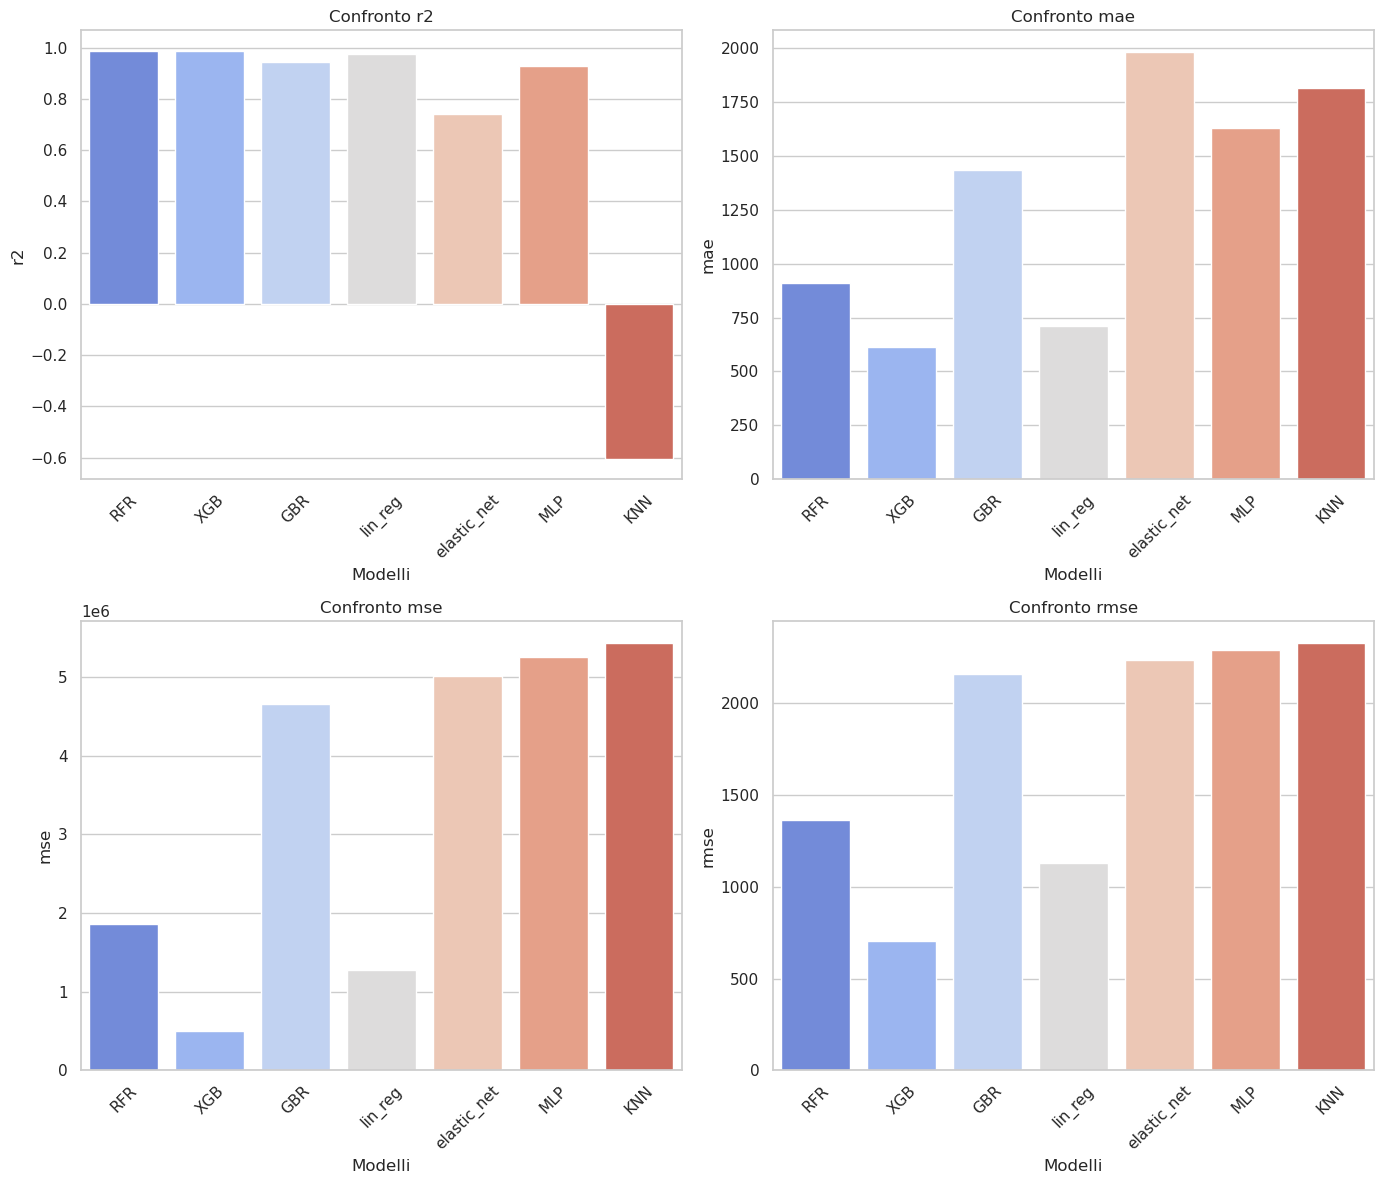

In [68]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convertiamo il dizionario in un DataFrame e lo trasformiamo per Seaborn
metrics_df = pd.DataFrame(dizionario_result).T.reset_index().melt(id_vars="index", var_name="Metrica", value_name="Valore")

# Impostazioni estetiche di Seaborn
sns.set_theme(style="whitegrid")

# Creazione di una griglia 2x2 per i 4 grafici
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Liste delle metriche per generare i grafici
metriche = ["r2", "mae", "mse", "rmse"]

# Generiamo un grafico per ogni metrica
for i, metrica in enumerate(metriche):
    ax = axes[i // 2, i % 2]  # Posizionamento nella griglia
    subset = metrics_df[metrics_df["Metrica"] == metrica]  # Filtriamo solo la metrica attuale
    sns.barplot(data=subset, x="index", y="Valore", ax=ax, palette="coolwarm")
    
    # Personalizzazione dei grafici
    ax.set_title(f"Confronto {metrica}")
    ax.set_xlabel("Modelli")
    ax.set_ylabel(metrica)
    ax.set_xticklabels(subset["index"], rotation=45)  # Ruotiamo i nomi dei modelli per leggibilità

# Ottimizziamo la disposizione della griglia
plt.tight_layout()
plt.show()


In [ ]:

# Estrai i migliori parametri da best_metrics
best_n_estimators = best_metrics["Best Params"]["n_estimators"]
best_max_depth = best_metrics["Best Params"]["max_depth"]
# Richiamo della fnzione per plottare i grafici delle metrche
plot_combined_metrics_fixed(
    metrics_df=all_metrics,
    fixed_param="max_depth",
    fixed_value=best_max_depth,
    varying_param="n_estimators",
    title_prefix="Confronto per n_estimators"
)

# Grafico combinato con n_estimators fissato e max_depth variabile
plot_combined_metrics_fixed(
    metrics_df=all_metrics,
    fixed_param="n_estimators",
    fixed_value=best_n_estimators,
    varying_param="max_depth",
    title_prefix="Confronto per max_depth"
)

#PlottingValori(y_test,Y_pred)


## XGBOOST

In [ ]:

# Richiamo della funzione per plottare i grafici delle metrche
plot_combined_metrics_fixed(
    metrics_df=metrics_df,
    fixed_param="max_depth",
    fixed_value=best_max_depth,
    varying_param="n_estimators",
    title_prefix="Confronto per n_estimators"
)

# Grafico combinato con n_estimators fissato e max_depth variabile
plot_combined_metrics_fixed(
    metrics_df=metrics_df,
    fixed_param="n_estimators",
    fixed_value=best_n_estimators,
    varying_param="max_depth",
    title_prefix="Confronto per max_depth"
)

In [ ]:
# Adapt data for**SHAP Analysis**

print(X_train_encoded.dtypes)
bool_columns = X_train_encoded.select_dtypes(include=['bool']).columns
X_train_encoded[bool_columns] = X_train_encoded[bool_columns].astype(int)
X_test_encoded[bool_columns] = X_test_encoded[bool_columns].astype(int)
print("dati aggiornati\n")
print(X_train_encoded.dtypes)

In [ ]:
explainer = shap.Explainer(model, X_train_encoded)  # Crea l'explainer SHAP
shap_values = explainer(X_test_encoded) # Calcola i valori SHAP

plt.figure(figsize=(12, 8))  # Aumenta le dimensioni a piacere
shap.summary_plot(shap_values, X_test_encoded)
shap.plots.bar(shap_values)  # Usa un bar plot per una visualizzazione più semplice
  # Salva il grafico come immagine

# **Visualizzazione 1: SHAP Summary Plot**
shap.summary_plot(shap_values, X_test_encoded)

# **Visualizzazione 2: SHAP Bar Plot (Importanza delle feature)**
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar")

In [ ]:
def generate_shap_explanation(shap_values, features, feature_names):
    explanation = "La previsione è stata influenzata principalmente da:\n"
    # Ordina le caratteristiche per l'impatto assoluto decrescente
    indices = np.argsort(-np.abs(shap_values))
    for i in indices:
        if shap_values[i] != 0:
            effect = "aumentato" if shap_values[i] > 0 else "diminuito"
            explanation += f"- {feature_names[i]} ha {effect} la previsione di {abs(shap_values[i]):.2f} punti.\n"
    return explanation

# Supponi di avere i valori SHAP e le caratteristiche per un singolo esempio
single_shap_values = shap_values[0]
features_example = X_test_encoded.iloc[0]
feature_names = X_test_encoded.columns

# Genera e stampa la spiegazione
print(generate_shap_explanation(single_shap_values.values, features_example, feature_names))


## Confronto tra i modelli
Arrivati a questo punto, abbiamo confrontato le metriche prestazionali dei vari modelli di Machine Learning per stabilire quali sono i migliori per il data set in esame.